# Cross Validation & Performance Evaluation

In [35]:
import torch
import numpy as np
from pathlib import Path
import sklearn
import matplotlib.pyplot as plt  

In [37]:
%matplotlib inline

## Collecting data

In [2]:
#options rotnet, jigsaw, simclr
model_name = "jigsaw" #<----------Specifiy model here!

dir = Path("data/" + model_name)

embedding_gallary = torch.load(dir / "embedding_gallary.torch")
embedding_gallary_norm = torch.load(dir / "embedding_gallary_norm.torch")
labels = list()
with open(dir / "embedding_gallary_labels.txt", "r") as f:
    labels = f.read().splitlines()
print(f"Data for model {model_name} succesfully read.\nembedding_gallary size: {embedding_gallary.shape}\
\nembedding_gallary_norm size: {embedding_gallary_norm.shape}\nlabels length: {len(labels)}")

Data for model jigsaw succesfully read.
embedding_gallary size: torch.Size([1643, 2048])
embedding_gallary_norm size: torch.Size([1643, 2048])
labels length: 1643


In [3]:
#Convert to numpy arrays:
embedding_gallary = embedding_gallary.numpy()
embedding_gallary_norm = embedding_gallary_norm.numpy()
labels = np.array(labels)
print(f"embedding_gallary size: {embedding_gallary.shape} and type {type(embedding_gallary)}\
\nembedding_gallary_norm size: {embedding_gallary_norm.shape} and type {type(embedding_gallary_norm)}\
\nLabels with size {labels.shape} and type {type(labels)}")

embedding_gallary size: (1643, 2048) and type <class 'numpy.ndarray'>
embedding_gallary_norm size: (1643, 2048) and type <class 'numpy.ndarray'>
Labels with size (1643,) and type <class 'numpy.ndarray'>


## Modelling

In [66]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### Train test split

In [5]:
train_set, test_set, train_labels, test_labels= train_test_split(
    embedding_gallary_norm, #data
    labels,  #targets
    test_size=0.3, #30% test set, 70% train set
    random_state=0 #for reproducable results of the random shuffling
)

In [6]:
#our training set looks like this
print(f"train_wine\n{train_set[:5]} \n\ntrain_labels \n{train_labels[:5]}")

train_wine
[[0.02544775 0.020538   0.01740147 ... 0.01681866 0.02483567 0.02203515]
 [0.02256873 0.02354292 0.01854632 ... 0.01829111 0.02163556 0.01661161]
 [0.02270747 0.02169326 0.01551284 ... 0.01687597 0.02394336 0.02305688]
 [0.02197867 0.0199231  0.01690955 ... 0.01391102 0.02325877 0.02385901]
 [0.02186836 0.02191272 0.01717913 ... 0.01505089 0.02387794 0.02157481]] 

train_labels 
['JupilerBlik50cl' 'TaoNaturalEnergizer250ml'
 'AquariusGreenSplashFles6x500ml' 'EvianOriginal50cl'
 'RedBullSugarFree4x250ml']


In [7]:
#our test set looks like this
print(f"test_wine\n{test_set[:5]} \n\ntest_labels \n{test_labels[:5]}")

test_wine
[[0.02402697 0.02201242 0.01798959 ... 0.01594797 0.02160397 0.0186317 ]
 [0.02455522 0.02038008 0.01421284 ... 0.01541032 0.02199945 0.02450591]
 [0.02201963 0.0233764  0.0137242  ... 0.01512802 0.02526198 0.02304043]
 [0.02663323 0.01934528 0.01630841 ... 0.01860074 0.02404338 0.02280958]
 [0.02728287 0.02368524 0.01962146 ... 0.01421808 0.02188295 0.02155648]] 

test_labels 
['InnocentOrangeWithBits' 'CapriSun' 'MonsterPunchEnergy500ml'
 'NaluOriginal6x350ml' 'StellaBlik50cl']


In [8]:
#Proportion of training data
prop_train = (len(train_set)/ len(embedding_gallary_norm) ) * 100
#Proportion of testing data
prop_test = (len(test_set)/ len(embedding_gallary_norm) ) * 100
print(f"Size of the training set {len(train_set)}\nThe training set contains {prop_train}% of the data\n")
print(f"Size of the test set {len(test_set)}\nThe test set contains {prop_test}% of the data")

Size of the training set 1150
The training set contains 69.99391357273281% of the data

Size of the test set 493
The test set contains 30.006086427267192% of the data


### Support Vector Machine (SVM)

In [81]:
#Create SVM estimator 
clf_svm = SVC(kernel="linear")
#fit on training data
# clf_svm.fit(embedding_gallary_norm, labels)
# y_pred = clf_svm.predict(embedding_gallary_norm)

In [79]:
y_true = labels.copy()
(y_pred == y_true).mean()

0.02130249543517955

### Multi Layer Perceptron (MLP)

In [56]:
#amount of classes to classify
print(len(np.unique(labels)))

406


In [63]:
#Create MLP estimator
clf_mlp = MLPClassifier(
    hidden_layer_sizes=(1024, 406),
    solver='sgd',
    max_iter=100_000
)

In [64]:
#fit on training data
clf_mlp.fit(embedding_gallary_norm, labels)

MLPClassifier(hidden_layer_sizes=(1028, 406), max_iter=100000, solver='sgd')

### K Nearest Neighbors (KNN)

In [70]:
#Create KNN estimator
clf_knn = KNeighborsClassifier(n_neighbors=10)

In [71]:
#fit on trainings data
clf_knn.fit(embedding_gallary_norm, labels)

KNeighborsClassifier(n_neighbors=10)

### Decision Tree Classifier (DTC)

In [23]:
#Create DTC estimator 
clf_tree = DecisionTreeClassifier(random_state=0)
#fit on training data
clf_tree.fit(embedding_gallary_norm, labels) # Build a decision tree classifier

DecisionTreeClassifier(random_state=0)

## Cross validation

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
#5 folds with 1/5 test data and 4/5 training data to cross validate
kf = KFold(n_splits=5)
#stratified kfold

In [84]:
train_test = kf.split(embedding_gallary_norm, y=labels)
for i, (train_index, test_index) in enumerate(kf.split(embedding_gallary_norm)):
    print(f"Fold {i}:")
    print(f"  Train: index[:5] {train_index[:5]} with shape{train_index.shape}")
    print(f"  Test:  index[:5] {test_index[:5]} with shape{test_index.shape}")

Fold 0:
  Train: index[:5] [329 330 331 332 333] with shape(1314,)
  Test:  index[:5] [0 1 2 3 4] with shape(329,)
Fold 1:
  Train: index[:5] [0 1 2 3 4] with shape(1314,)
  Test:  index[:5] [329 330 331 332 333] with shape(329,)
Fold 2:
  Train: index[:5] [0 1 2 3 4] with shape(1314,)
  Test:  index[:5] [658 659 660 661 662] with shape(329,)
Fold 3:
  Train: index[:5] [0 1 2 3 4] with shape(1315,)
  Test:  index[:5] [987 988 989 990 991] with shape(328,)
Fold 4:
  Train: index[:5] [0 1 2 3 4] with shape(1315,)
  Test:  index[:5] [1315 1316 1317 1318 1319] with shape(328,)


In [85]:
def cross_validate(estimator):
    #cross validation generator
    cv = kf.split(embedding_gallary_norm, y=labels)

    #calc cross validation
    scores = cross_val_score(
        estimator,              #the estimator/classifier
        embedding_gallary_norm, #data 
        y=labels,               #targets
        cv=cv                   #generator for array indicis in data that select a certain split out of "data"
    )
    print(scores)
    accuracy = scores.mean()
    std = scores.std()
    return accuracy, std

### Support Vector Machine (SVM)

In [86]:
accuracy, std = cross_validate(clf_svm)
print(f"Support Vector Machine (SVM):\nAccuracy: {accuracy} \nstd_dev: {std}\n")

[0. 0. 0. 0. 0.]
Support Vector Machine (SVM):
Accuracy: 0.0 
std_dev: 0.0



### Multi Layer Perceptron (MLP)

In [69]:
accuracy, std = cross_validate(clf_mlp)
print(f"Multi Layer Perceptron (MLP):\nAccuracy: {accuracy} \nstd_dev: {std}\n")

[0. 0. 0. 0. 0.]
Multi Layer Perceptron (MLP):
Accuracy: 0.0 
std_dev: 0.0



### K Nearest Neighbors (KNN)

In [72]:
accuracy, std = cross_validate(clf_knn)
print(f"K Nearest Neighbors (KNN):\nAccuracy: {accuracy} \nstd_dev: {std}\n")

/home/olivier/Documents/master/mp/.venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/olivier/Documents/master/mp/.venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the v

[0.         0.         0.00607903 0.         0.        ]
K Nearest Neighbors (KNN):
Accuracy: 0.0012158054711246201 
std_dev: 0.0024316109422492403



/home/olivier/Documents/master/mp/.venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Decision Tree Classifier (DCT)

In [30]:
accuracy, std = cross_validate(clf_tree)
print(f"Decision Tree Classifier (DTC):\nAccuracy: {accuracy} \nstd_dev: {std}\n")

[0. 0. 0. 0. 0.]
Decision Tree Classifier (DTC):
Accuracy: 0.0 
std_dev: 0.0



## Testing performance

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sys

In [52]:
def test_performance(estimator, name_estimator:str):
    """
    Calculate performance for the given estimator/classifier.
    Performance is given by:
    -Accuracy on test set
    -Confusion matrix
    """
    estimator.fit(train_set, train_labels) #retrain on training set
    accuracy = estimator.score(test_set, test_labels) #calc acc score on testing set
    print(f"Accuracy {name_estimator}: {accuracy}\n")
    #Ground truth
    y_true = test_labels.copy()
    #Predictions made by clf_tree
    y_pred = estimator.predict(test_set)

    #compute confusion matrix
    conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    #predicted class is the column nr, ground truth is the row nr
    #correct classifications can be found on the diagonal
    print(f"Confusion Matrix {name_estimator}:")
    print("rows are the true label")
    print("cols are the predicted label")
    print(conf_mat)


### Suport Vector Machine (SVM)

In [53]:
test_performance(clf_svm, "Support Vector Machine")

Accuracy Support Vector Machine: 0.07099391480730223

Confusion Matrix Support Vector Machine
rows are the true label
cols are the predicted label
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


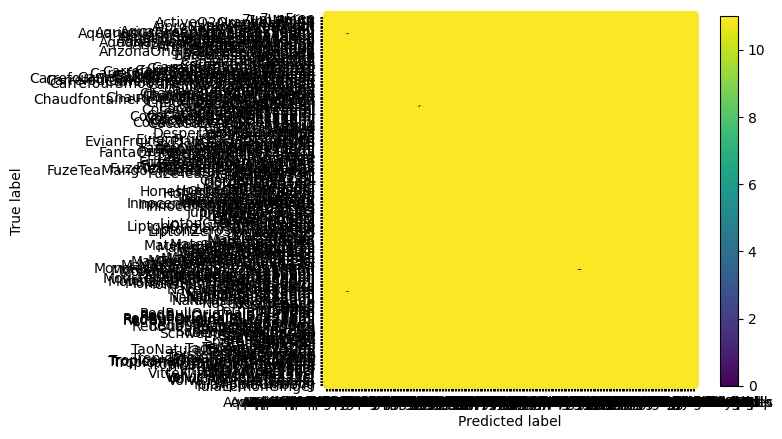

In [40]:
plot_confusion_matrix(clf_svm, test_set, test_labels)
plt.show()

### Multi Layer Perceptron (MLP)

In [80]:
test_performance(clf_mlp, "Multi Layer Perceptron")

Accuracy Multi Layer Perceptron: 0.02434077079107505

Confusion Matrix Multi Layer Perceptron
rows are the true label
cols are the predicted label
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/home/olivier/Documents/master/mp/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


### K Nearest Neighbors (KNN)

In [ ]:
test_performance(clf_knn, "K Nearest Neighbors")

### Decision Tree Classifier (DTC)

In [34]:
test_performance(clf_tree, "Decision Tree Classifier")

Accuracy Decision Tree Classifier: 0.012170385395537525
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
